In [160]:
import requests
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import json

In [161]:
resp = requests.get('https://mlcore-305422.ew.r.appspot.com/ping').text
resp

'i am alive..'

In [162]:
f = open("news.txt", "r")
news_text = f.read()
news_text

'Deutsche Bank today announced the launch of GEM Connect, a component-based solution designed to address workflow challenges across collections, payments, funding and FX in APAC markets with capital restrictions.\n\nDeveloped by the bank’s Corporate Bank and Fixed Income & Currencies business units in APAC, GEM Connect links treasury processes together into automated workflows, simplifying complex processes for clients moving money to, from and across markets with capital restrictions.\n\nUsing any combination of GEM Connect’s components, such as its rules-based FX execution tool and payment and hedge matching solution, Deutsche Bank is able to provide a one-stop liquidity and FX management solution for its clients in emerging markets such as India, Indonesia, Korea, Mainland China, Malaysia, Philippines, Taiwan and Thailand.\n\nUse cases can include:\n\nTarget balance automation to support up and downstream cross-border intra-company payments, with or without an account to streamline 

In [163]:
#news= {'text':'Google Tesla Elon Musk'}
news= {'text':news_text}
#entities = requests.get('https://mlcore-305422.ew.r.appspot.com/entities?text=Google%20Tesla%20Elon%20Musk')
entities = requests.post('https://mlcore-305422.ew.r.appspot.com/entities', json=news)
entities.text

'[{"name": "GEM Connect", "type": "OTHER", "Salience": 0.17117777466773987}, {"name": "Deutsche Bank", "type": "ORGANIZATION", "Salience": 0.1417178511619568, "wikipedia_url": "https://en.wikipedia.org/wiki/Deutsche_Bank", "mid": "/m/02lc8s"}, {"name": "launch", "type": "EVENT", "Salience": 0.07941644638776779}, {"name": "FX", "type": "ORGANIZATION", "Salience": 0.065968357026577, "mid": "/m/02_cz4", "wikipedia_url": "https://en.wikipedia.org/wiki/Foreign_exchange_market"}, {"name": "payments", "type": "OTHER", "Salience": 0.0424685999751091}, {"name": "markets", "type": "OTHER", "Salience": 0.0424685999751091}, {"name": "collections", "type": "WORK_OF_ART", "Salience": 0.03254654258489609}, {"name": "capital restrictions", "type": "OTHER", "Salience": 0.03254654258489609}, {"name": "funding", "type": "OTHER", "Salience": 0.028642140328884125}, {"name": "workflow challenges", "type": "OTHER", "Salience": 0.028642140328884125}, {"name": "APAC", "type": "OTHER", "Salience": 0.02767768129

In [164]:
data = json.loads(entities.text)
df = pd.json_normalize(data)
df

,name,type,Salience,wikipedia_url,mid,value
0,GEM Connect,OTHER,0.171178,NaN,NaN,NaN
1,Deutsche Bank,ORGANIZATION,0.141718,https://en.wikipedia.org/wiki/Deutsche_Bank,/m/02lc8s,NaN
2,launch,EVENT,0.079416,NaN,NaN,NaN
3,FX,ORGANIZATION,0.065968,https://en.wikipedia.org/wiki/Foreign_exchange...,/m/02_cz4,NaN
4,payments,OTHER,0.042469,NaN,NaN,NaN
...,...,...,...,...,...,...
85,Head,PERSON,0.000992,NaN,NaN,NaN
86,role,OTHER,0.000833,NaN,NaN,NaN
87,APAC,ORGANIZATION,0.000788,NaN,NaN,NaN
88,Asia,LOCATION,0.000633,https://en.wikipedia.org/wiki/Asia,/m/0j0k,NaN


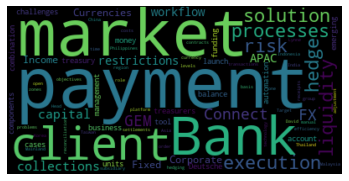

In [165]:
wordcloud = WordCloud().generate(' '.join(df['name']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [166]:
from pivottablejs import pivot_ui
pivot_ui(df,outfile_path='pivottablejs.html')